In [1]:
import matplotlib
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd 
import sklearn

# Step 1: Find and download a dataset.

Read in Peace Agreement dataset, downloaded from https://ucdp.uu.se/downloads/index.html#peaceagreement. 
"The Peace Agreement dataset covers peace agreements signed between at least two opposing primary warring parties 
in an armed conflict 1975-2018". 

In order to have another integer variable that I can transform, I've added Number of Battle-Related deaths to the dataset from the Uppsala Conflict Data Program's armed conflict dataset; both datasets share a conflict id number. Unfortunately, many conflicts have more than one peace agreement process which renders a linear merge relatively useless -- it is, however, the best that I can do with my current statistical and Python understanding. 

In [2]:
peace = pd.read_csv("ucdp-peace-agreements-191_edit.csv")

In [3]:
peace.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354 entries, 0 to 353
Data columns (total 47 columns):
paid               354 non-null int64
region             354 non-null int64
conflict_id        354 non-null object
Deaths             327 non-null float64
conflict_name      354 non-null object
incompatibility    354 non-null int64
year               354 non-null int64
ended              354 non-null bool
cease              354 non-null int64
intarmy            354 non-null int64
ddr                354 non-null int64
withd              354 non-null int64
mil prov           354 non-null int64
pp                 354 non-null int64
intgov             354 non-null int64
intciv             354 non-null int64
elections          354 non-null int64
interrim           354 non-null int64
natalks            354 non-null int64
shagov             354 non-null int64
pol prov           354 non-null int64
aut                354 non-null int64
fed                354 non-null int64
ind               

This dataset, with 46 dimensions and only 354 observations, might be a bit small for meaningful modeling. It might also present opportunities to reduce the number of dimensions by examining collinearity and transforming features. 

# Step 2: Divide into a training set and a testing set. 

I am trying to predict dependent variable 'whether a peace agreement has ended or not' (boolean variables, True or False)
so the target value I want to stratify my train_test_split on is the variable "ended".

In [4]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=0) 
for train_index, test_index in split.split(peace, peace["ended"]):    
    strat_train_set = peace.loc[train_index]    
    strat_test_set = peace.loc[test_index]

Check if the train set has proportional true/false "ended" observations compared to the whole dataset. 

In [5]:
peace["ended"].value_counts() / len(peace)

False    0.627119
True     0.372881
Name: ended, dtype: float64

In [6]:
strat_train_set["ended"].value_counts() / len(strat_train_set)

False    0.625442
True     0.374558
Name: ended, dtype: float64

These are very similar proportions, so I believe I can feel okay with that. 

In [7]:
peace_train = strat_train_set.copy()

# Step 3: Explore your training set.

In [8]:
peace_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 283 entries, 130 to 267
Data columns (total 47 columns):
paid               283 non-null int64
region             283 non-null int64
conflict_id        283 non-null object
Deaths             264 non-null float64
conflict_name      283 non-null object
incompatibility    283 non-null int64
year               283 non-null int64
ended              283 non-null bool
cease              283 non-null int64
intarmy            283 non-null int64
ddr                283 non-null int64
withd              283 non-null int64
mil prov           283 non-null int64
pp                 283 non-null int64
intgov             283 non-null int64
intciv             283 non-null int64
elections          283 non-null int64
interrim           283 non-null int64
natalks            283 non-null int64
shagov             283 non-null int64
pol prov           283 non-null int64
aut                283 non-null int64
fed                283 non-null int64
ind             

In [9]:
peace_train.describe()

,paid,region,Deaths,incompatibility,year,cease,intarmy,ddr,withd,mil prov,...,reaffirmid,outlin,pko,gender,co impl,active_conflict,termdur,inclusive,pa type,out_iss
count,283.000000,283.000000,264.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,...,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000
mean,1314.660777,3.699647,14595.515152,1.742049,1998.989399,0.462898,0.261484,0.318021,0.095406,0.590106,...,0.003534,0.318021,0.134276,0.307420,0.406360,0.699647,-68.515901,1.441696,1.982332,1.689046
std,261.492887,1.040782,30109.712398,0.505886,9.688219,0.499505,0.440221,0.466533,0.294296,0.492685,...,0.059444,0.466533,0.341552,0.462243,0.492023,0.459224,46.625742,0.518413,0.660195,1.598577
min,24.000000,1.000000,35.000000,1.000000,1975.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-99.000000,-1.000000,1.000000,0.000000
25%,1107.000000,3.000000,990.000000,1.000000,1993.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-99.000000,1.000000,2.000000,0.000000
50%,1368.000000,4.000000,6407.000000,2.000000,1998.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-99.000000,1.000000,2.000000,1.000000
75%,1516.000000,4.000000,13810.000000,2.000000,2006.000000,1.000000,1.000000,1.000000,0.000000,1.000000,...,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,3.000000
max,1625.000000,5.000000,201053.000000,3.000000,2018.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,15.000000,2.000000,3.000000,5.000000


describe() and info() let me know that there are certain variables that should have different data types, like paid.
"paid" is an id variable specific to each peace agreement, and as an ID I won't be performing statistical functions on it. 

It should also be noted that many of these variables are binary, which impacts the value of their descriptive stats. The "Deaths" variable is also skewed, as larger conflicts incurring more battle-related deaths may require more peace agreements and are therefore listed multiple times, throwing off the descriptive statistics. 

# Step 4: Clean your training set. 

In [10]:
print(peace_train.isnull().sum())

paid                0
region              0
conflict_id         0
Deaths             19
conflict_name       0
incompatibility     0
year                0
ended               0
cease               0
intarmy             0
ddr                 0
withd               0
mil prov            0
pp                  0
intgov              0
intciv              0
elections           0
interrim            0
natalks             0
shagov              0
pol prov            0
aut                 0
fed                 0
ind                 0
ref                 0
shaloc              0
regdev              0
cul                 0
demarcation         0
locgov              0
terr prov           0
amn                 0
pris                0
recon               0
return              0
justice prov        0
reaffirm            0
reaffirmid          0
outlin              0
pko                 0
gender              0
co impl             0
active_conflict     0
termdur             0
inclusive           0
pa type   

"Deaths" has 19 null values. Because my dataset is so small already, I don't want to drop any observations. While I know the observations are already skewed, I'm going to set the nulls to the median value using Imputer, to see what that's like. 

In [11]:
from sklearn.preprocessing import Imputer
imputer = Imputer(strategy="median")

C:\Python\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [12]:
peace_med = peace_train.drop("conflict_name", axis=1)

In [13]:
peace_med = peace_med.drop("conflict_id", axis=1)

In [14]:
imputer.fit(peace_med)

Imputer(axis=0, copy=True, missing_values='NaN', strategy='median', verbose=0)

In [15]:
X = imputer.transform(peace_med) 

In [16]:
peace_tr = pd.DataFrame(X, columns=peace_med.columns)

In [17]:
peace_tr.describe()

,paid,region,Deaths,incompatibility,year,ended,cease,intarmy,ddr,withd,...,reaffirmid,outlin,pko,gender,co impl,active_conflict,termdur,inclusive,pa type,out_iss
count,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,...,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000
mean,1314.660777,3.699647,14045.756184,1.742049,1998.989399,0.374558,0.462898,0.261484,0.318021,0.095406,...,0.003534,0.318021,0.134276,0.307420,0.406360,0.699647,-68.515901,1.441696,1.982332,1.689046
std,261.492887,1.040782,29150.068955,0.505886,9.688219,0.484866,0.499505,0.440221,0.466533,0.294296,...,0.059444,0.466533,0.341552,0.462243,0.492023,0.459224,46.625742,0.518413,0.660195,1.598577
min,24.000000,1.000000,35.000000,1.000000,1975.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-99.000000,-1.000000,1.000000,0.000000
25%,1107.000000,3.000000,1010.000000,1.000000,1993.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-99.000000,1.000000,2.000000,0.000000
50%,1368.000000,4.000000,6407.000000,2.000000,1998.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-99.000000,1.000000,2.000000,1.000000
75%,1516.000000,4.000000,10698.500000,2.000000,2006.000000,1.000000,1.000000,1.000000,1.000000,0.000000,...,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,3.000000
max,1625.000000,5.000000,201053.000000,3.000000,2018.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,15.000000,2.000000,3.000000,5.000000


Change data types if necessary.

In [18]:
peace_tr["paid"] = peace_tr["paid"].astype(object)

In [19]:
peace_tr["ended"] = peace_tr["ended"].astype(float)

# Step 5: Visualize the data in your training set.

In [20]:
from pandas.plotting import scatter_matrix

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000028764E5B948>,
      dtype=object)

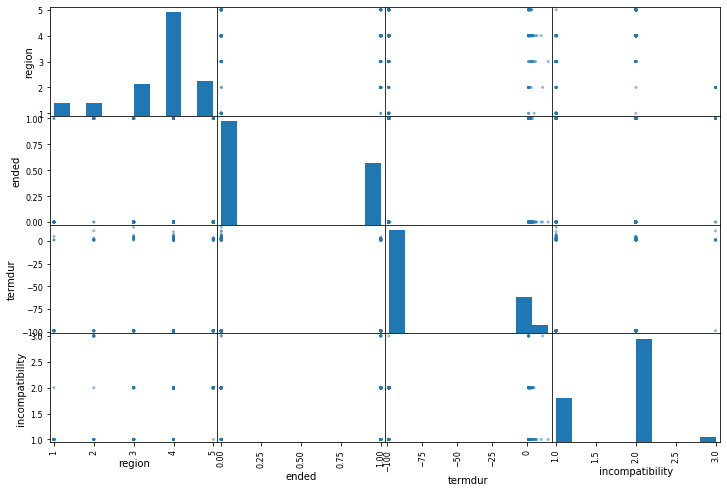

In [21]:
attributes = ["region", "ended", "termdur",             
              "incompatibility"] 
scatter_matrix(peace_tr[attributes], figsize=(12, 8))

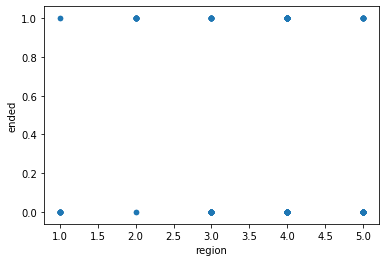

In [22]:
%matplotlib inline  
import matplotlib.pyplot as plt 
peace_tr.plot(kind="scatter", x="region", y="ended")
plt.show()

This isn't a useful plot in terms of what it shows me; rather, it's useful in terms of what it doesn't show! It would appear that, when working with binary variables, I should be much more interested in the count of variable observations that are binary and less interested in the actual visualization of 0s and 1s. 

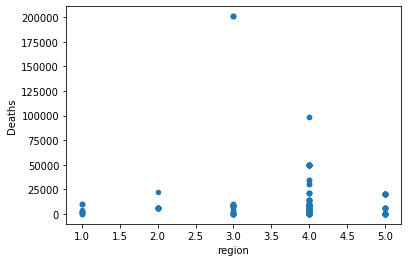

In [23]:
peace_tr.plot(kind="scatter", x="region", y="Deaths")
plt.show()

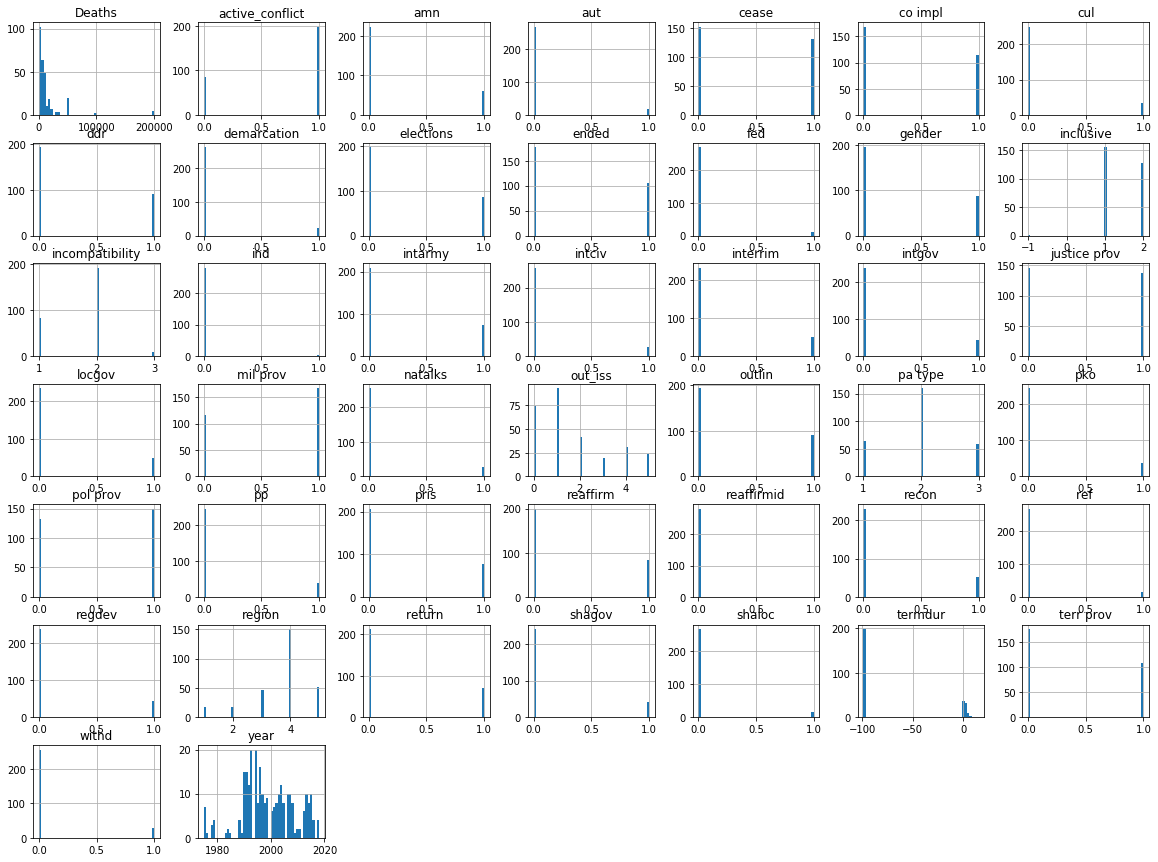

In [24]:
peace_tr.hist(bins=50, figsize=(20,15)) 
plt.show()

# Step 6: Apply transformations to your training set and visualize the transformations. 

I can see the amount of variance in the term duration variable, "termdur", the number of years between an active conflict and the signing of a peace agreement, in order to see if I should standardize it. 

In [25]:
print(peace_tr[["termdur"]].var())

termdur    2173.959853
dtype: float64


What happens if I log normalize the termdur variable? 
When I look at the variance in a variable's observations, at what level of variation do I want to begin to standardize? 

In [26]:
peace_tr["termdur_log"] = np.log(peace_tr["termdur"])

C:\Python\lib\site-packages\pandas\core\series.py:853: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [27]:
print(peace_tr[["termdur_log"]].var())

termdur_log    0.458678
dtype: float64


I'm going to do the same thing for the "Deaths" feature. 

In [28]:
print(peace_tr[["Deaths"]].var())

Deaths    8.497265e+08
dtype: float64


In [29]:
peace_tr["Deaths_log"] = np.log(peace_tr["Deaths"])

In [30]:
print(peace_tr[["Deaths_log"]].var())

Deaths_log    3.089998
dtype: float64


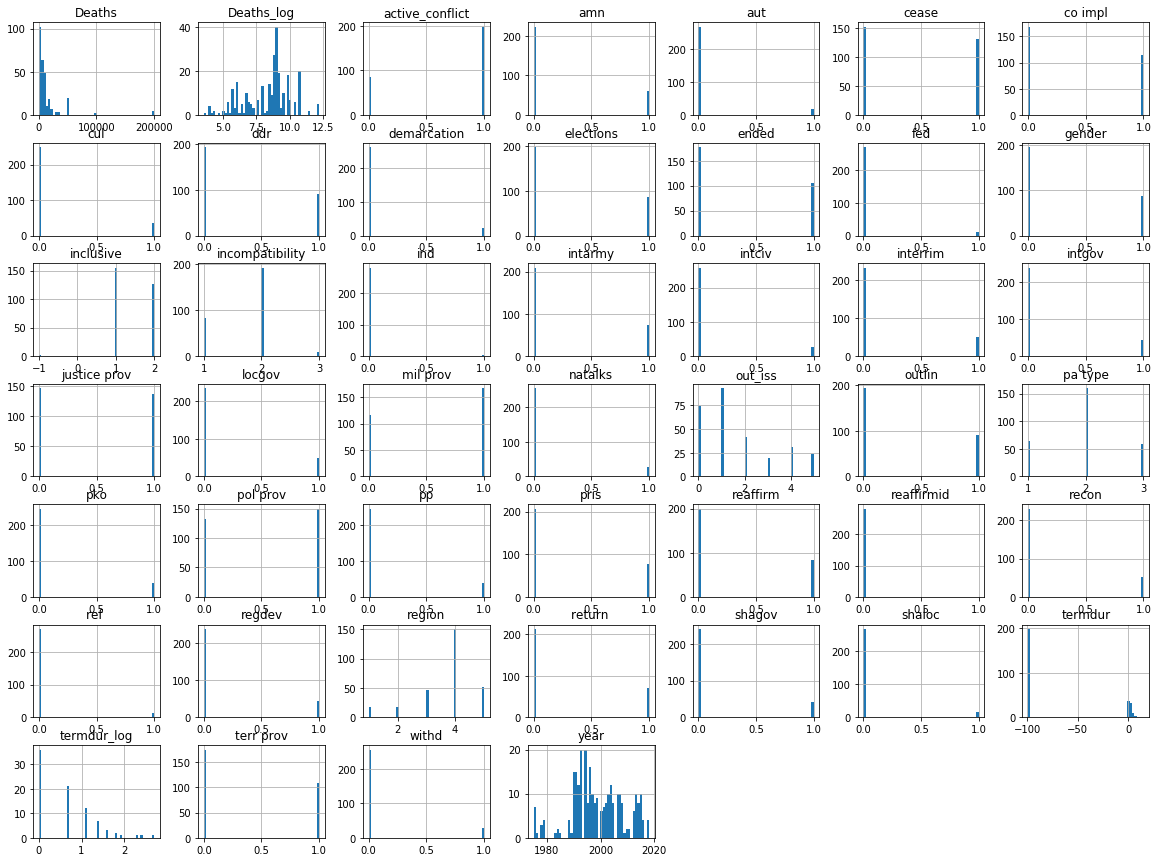

In [31]:
peace_tr.hist(bins=50, figsize=(20,15)) 
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000028767393788>,
      dtype=object)

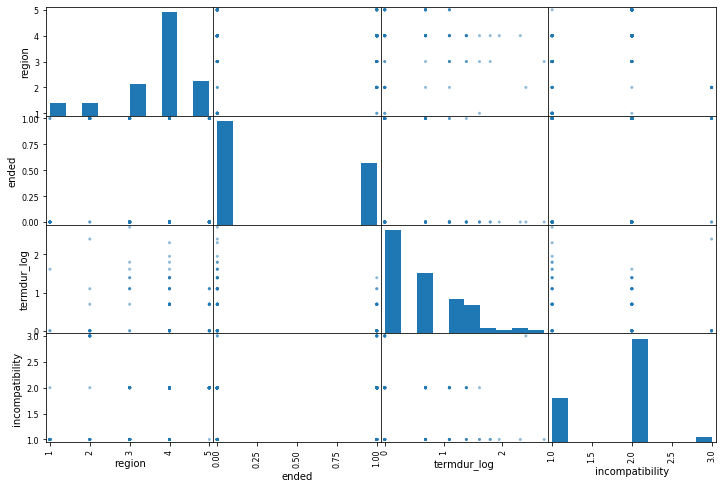

In [32]:
attributes = ["region", "ended", "termdur_log",             
              "incompatibility"] 
scatter_matrix(peace_tr[attributes], figsize=(12, 8))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000287676F35C8>,
      dtype=object)

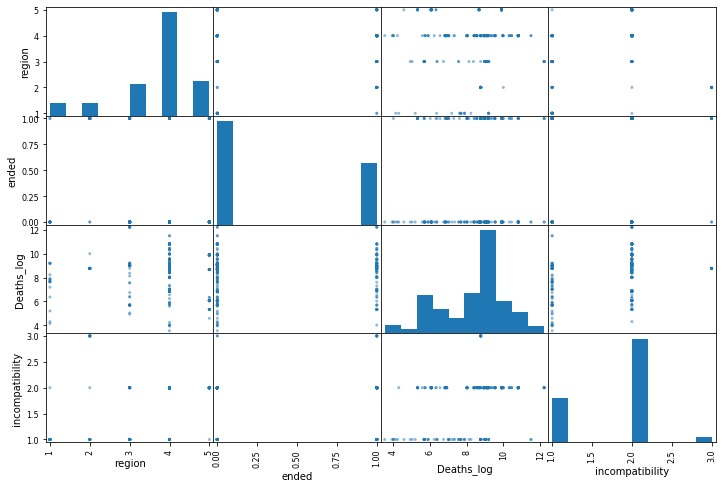

In [33]:
attributes = ["region", "ended", "Deaths_log",             
              "incompatibility"] 
scatter_matrix(peace_tr[attributes], figsize=(12, 8))

In [34]:
corr_matrix = peace_tr.corr()

In [35]:
 corr_matrix["Deaths"].sort_values(ascending=False)

Deaths             1.000000
Deaths_log         0.600818
inclusive          0.267028
interrim           0.193442
active_conflict    0.186928
intarmy            0.183864
incompatibility    0.143384
intgov             0.137744
pol prov           0.116423
year               0.109154
elections          0.105982
cease              0.085577
ref                0.081293
natalks            0.080890
out_iss            0.062284
shagov             0.058727
mil prov           0.052361
fed                0.050568
ended              0.033979
withd              0.028164
pp                 0.018486
demarcation        0.016149
shaloc             0.003436
gender            -0.002639
region            -0.006716
recon             -0.007987
pris              -0.011712
return            -0.013521
ind               -0.022147
reaffirmid        -0.022500
co impl           -0.026891
amn               -0.028575
reaffirm          -0.029764
pa type           -0.031248
intciv            -0.032606
cul               -0

In [36]:
 corr_matrix["ended"].sort_values(ascending=False)

ended              1.000000
natalks            0.171147
out_iss            0.150799
cease              0.130792
pris               0.124095
pa type            0.109370
incompatibility    0.106154
inclusive          0.101296
Deaths_log         0.095626
pol prov           0.085078
reaffirmid         0.076950
interrim           0.074030
pko                0.059244
gender             0.054007
regdev             0.050760
withd              0.046892
shagov             0.038520
intarmy            0.037923
Deaths             0.033979
locgov             0.031772
active_conflict    0.029263
justice prov       0.024623
ind                0.021865
demarcation        0.020714
shaloc             0.019433
fed                0.018307
elections          0.012508
mil prov           0.006662
terr prov         -0.006797
recon             -0.008993
intgov            -0.009682
aut               -0.011291
cul               -0.016504
amn               -0.026319
termdur           -0.033774
intciv            -0

Wow! I really wanted, initially, to combine conflict variables with economic and development indicators but I just could not figure out how to do the merge appropriately. I really, really want to be able to figure that out, because it is exciting to see data in this way!